In [1]:
from pathlib import Path

import ll
import rich

run_id = "0wdtgx2m"
run_dir = Path(
    f"/net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/{run_id}/"
)
assert (
    run_dir.exists() and run_dir.is_dir()
), f"run_dir: {run_dir} does not exist or is not a directory"
print(run_dir)

ll.pretty()
ll.snapshot.load_python_path_from_run(run_dir)

TensorBoard/TensorBoardX not found. Disabling TensorBoardLogger. Please install TensorBoard with `pip install tensorboard` or TensorBoardX with `pip install tensorboardx` to enable TensorBoard logging.


/net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/0wdtgx2m


[21:45:05] CRITICAL Added                                                                           ]8;id=65645;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/snapshot.py\snapshot.py]8;;\:]8;id=161297;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/snapshot.py#148\148]8;;\
                    /net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a                
                    7f-43f0-ba6f-a03e705e689a/ll_snapshot to sys.path. Modules: jmppeft                            

In [2]:
import os

os.environ["LL_DISABLE_TYPECHECKING"] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "3"


import torch

torch.no_grad().__enter__()
torch.inference_mode().__enter__()

In [3]:
ckpt_path = run_dir / "checkpoint" / "last.ckpt"
# If the file is a symlink, get the target
if ckpt_path.is_symlink():
    print(f"Symlink found {ckpt_path} => {ckpt_path.resolve()}")
    ckpt_path = ckpt_path.resolve()

ckpt_path

Symlink found /net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/0wdtgx2m/checkpoint/last.ckpt => /net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/0wdtgx2m/checkpoint/epoch=0-step=12073-val_matbench_discovery_force_mae=0.07568363845348358.ckpt


Path('/net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/0wdtgx2m/checkpoint/epoch=0-step=12073-val_matbench_discovery_force_mae=0.07568363845348358.ckpt')

In [4]:
from jmppeft.tasks.finetune.base import FinetuneMatBenchDiscoveryIS2REDatasetConfig

dataset_config = FinetuneMatBenchDiscoveryIS2REDatasetConfig(
    # sample_n=DatasetSampleNConfig(sample_n=16, seed=42)
)
print(dataset_config)

dataset_og = dataset_config.create_dataset()
dataset_og, len(dataset_og)

[21:45:36] CRITICAL Type checking is disabled due to the environment variable                       ]8;id=384361;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/typecheck.py\typecheck.py]8;;\:]8;id=993828;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/typecheck.py#55\55]8;;\
                    LL_DISABLE_TYPECHECKING.                                                                       

[21:45:37] INFO     PyTorch version 2.2.2 available.                                                   ]8;id=740639;file:///net/csefiles/coc-fung-cluster/nima/miniforge3/envs/jmp-peft/lib/python3.11/site-packages/datasets/config.py\config.py]8;;\:]8;id=830348;file:///net/csefiles/coc-fung-cluster/nima/miniforge3/envs/jmp-peft/lib/python3.11/site-packages/datasets/config.py#58\58]8;;\


Loading 'wbm_summary' from cached file at '/nethome/nsg6/.cache/matbench-discovery/1.0.0/wbm/2023-12-13-wbm-summary.csv.gz'


(<jmppeft.datasets.mpd_is2re.MatBenchDiscoveryIS2REDataset at 0x7f9a898fef50>,
 256963)

In [5]:
from jmppeft.tasks.finetune import matbench_discovery as M

default_dtype = torch.float32
model = M.MatbenchDiscoveryModel.load_checkpoint(
    ckpt_path,
    # hparams=hparams,
    map_location="cuda",
)
model = model.to(default_dtype)
model

[21:46:08] CRITICAL Using regular backbone                                                              ]8;id=53151;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=927241;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/tasks/finetune/base.py#605\605]8;;\

Unrecognized arguments:  dict_keys(['name', 'learnable_rbf', 'learnable_rbf_stds', 'unique_basis_per_layer', 'dropout', 'edge_dropout', 'ln_per_layer', 'scale_factor_to_ln'])


           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=370739;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=757468;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=113627;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=90271;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=343451;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=622473;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=740674;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=275050;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=484297;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=541998;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=716813;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=798680;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

[21:46:09] INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=682281;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=263748;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

[21:46:11] CRITICAL Constructed backbone with dlora=None                                                ]8;id=702978;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=261783;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/tasks/finetune/base.py#616\616]8;;\

           INFO     Registered 12 shared parameters                                         ]8;id=279609;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/model/modules/shared_parameters.py\shared_parameters.py]8;;\:]8;id=931859;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/model/modules/shared_parameters.py#72\72]8;;\

           INFO     List of ignored parameters: []                                                      ]8;id=849001;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=699048;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/tasks/finetune/base.py#694\694]8;;\

           CRITICAL Freezing 0 parameters (0.00%) out of 43,146,824 total parameters (43,146,824        ]8;id=827425;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=274744;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/9b7d10c5-8a7f-43f0-ba6f-a03e705e689a/ll_snapshot/jmppeft/tasks/finetune/base.py#923\923]8;;\
                    trainable)                                                                                     

MatbenchDiscoveryModel(config=MatbenchDiscoveryConfig(name=mptrj-jmps-bsz30-linrefenergy-lr8e-05-ln-direct-maceenergy-maceforce-rele-ec2.0-fc10.0-sc100.0-posaug_std0.01, project=jmp_mptrj), device=cuda:0)

In [6]:
from collections import Counter

import jmppeft.modules.dataset.dataset_transform as DT
import torch.utils._pytree as tree
from lightning.fabric.utilities.apply_func import move_data_to_device
from torch_geometric.data import Batch, Data


def data_transform(data: Data):
    data = model.data_transform(data)
    data = Data.from_dict(
        tree.tree_map(
            lambda x: x.type(default_dtype)
            if torch.is_tensor(x) and torch.is_floating_point(x)
            else x,
            data.to_dict(),
        )
    )
    return data


def composition(data: Batch):
    return dict(Counter(data.atomic_numbers.tolist()))


num_items = 1024

dataset = DT.transform(dataset_og, data_transform)
dataset = DT.sample_n_transform(dataset, n=num_items, seed=42)


idx = 32
data = Batch.from_data_list([dataset[idx]])
rich.print(data.to_dict(), composition(data))

{
    'pos': tensor[11, 3] n=33 x∈[-4.287, 6.933] μ=1.411 σ=2.424,
    'id': ['wbm-3-72883'],
    'atomic_numbers': tensor[11] i64 x∈[50, 79] μ=62.000 σ=14.269,
    'cell': tensor[1, 3, 3] n=9 x∈[-3.509, 6.938] μ=1.065 σ=4.112 [[[6.029, 0., -3.509], [-2.037, 5.674, -3.509], 
[0., 0., 6.938]]],
    'y_formation': tensor[1] [-0.236],
    'y_formation_correction': tensor[1] [0.],
    'y_above_hull': tensor[1] [0.093],
    'natoms': tensor[1] i64 [11],
    'pos_noise': tensor[11, 3] n=33 x∈[-0.020, 0.021] μ=-0.001 σ=0.007,
    'tags': tensor[11] i64 x∈[2, 2] μ=2.000 σ=0.,
    'fixed': tensor[11] bool all_zeros,
    'batch': tensor[11] i64 all_zeros,
    'ptr': tensor[2] i64 μ=5.500 σ=7.778 [0, 11]
}
{66: 1, 50: 6, 79: 4}

In [7]:
from jmppeft.modules.relaxer import ModelOutput, Relaxer
from matbench_discovery.energy import get_e_form_per_atom

USE_Y_RELAXED = False
LINREF = None


def model_fn(data, initial_data, *, use_y_relaxed: bool = USE_Y_RELAXED) -> ModelOutput:
    model_out = model.forward_denormalized(data)

    energy = model_out["y_relaxed"] if use_y_relaxed else model_out["y"]
    # energy = model_out["y"]
    # relaxed_energy = model_out["y_relaxed"]
    forces = model_out["force"]
    stress = model_out["stress"]

    # Undo the linref
    if LINREF is not None:
        pass

    # JMP-S v2 energy is corrected_energy, i.e., DFT total energy
    # This energy is now DFT total energy, we need to convert it to formation energy per atom
    energy = get_e_form_per_atom(
        {
            "composition": composition(data),
            "energy": energy,
        }
    )
    assert isinstance(energy, torch.Tensor)
    # assert isinstance(relaxed_energy, torch.Tensor)

    # Add the correction factor
    if False:
        energy += initial_data.y_formation_correction.item()

    # energy, relaxed_energy = tree.tree_map(
    #     lambda energy: energy.view(1), (energy, relaxed_energy)
    # )
    energy = energy.view(1)
    forces = forces.view(-1, 3)
    stress = stress.view(1, 3, 3) if stress.numel() == 9 else stress.view(1, 6)

    return {
        "energy": energy,
        # "relaxed_energy": relaxed_energy,
        "forces": forces,
        "stress": stress,
    }


data = move_data_to_device(data, model.device)
model_fn(data, data)

{'energy': tensor[1] cuda:0 [3.732],
 'forces': tensor[11, 3] n=33 x∈[-0.575, 0.424] μ=-0.001 σ=0.224 cuda:0,
 'stress': tensor[1, 3, 3] n=9 x∈[-0.124, -0.002] μ=-0.043 σ=0.060 cuda:0 [[[-0.123, -0.004, -0.002], [-0.004, -0.123, -0.002], [-0.002, -0.002, -0.124]]]}

In [8]:
from functools import partial

import rich
from jmppeft.modules.relaxer import RelaxerConfig

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    fmax=0.05,
    ase_filter="exp",
)
relaxer = Relaxer(
    config=config,
    model=partial(model_fn, use_y_relaxed=False),
    collate_fn=model.collate_fn,
    device=model.device,
)
rich.print(data.y_formation)
relax_out = relaxer.relax(data)
# rich.print(relax_out)

energy = relax_out.atoms.get_total_energy()
rich.print(energy, data.y_formation)

tensor[1] cuda:0 [-0.236]

      Step     Time          Energy          fmax
FIRE:    0 21:46:22        3.732018        0.593462
FIRE:    1 21:46:22        3.730100        0.441966
FIRE:    2 21:46:22        3.736407        0.264569
FIRE:    3 21:46:22        3.733678        0.258783
FIRE:    4 21:46:23        3.729731        0.334859
FIRE:    5 21:46:23        3.729136        0.315964
FIRE:    6 21:46:23        3.727939        0.279466
FIRE:    7 21:46:23        3.726440        0.250866
FIRE:    8 21:46:23        3.724429        0.249372
FIRE:    9 21:46:23        3.722156        0.247539
FIRE:   10 21:46:23        3.719627        0.245419
FIRE:   11 21:46:23        3.716926        0.243122
FIRE:   12 21:46:23        3.713698        0.240075
FIRE:   13 21:46:23        3.709965        0.236296
FIRE:   14 21:46:23        3.705359        0.231404
FIRE:   15 21:46:23        3.699930        0.225269
FIRE:   16 21:46:23        3.693406        0.217694
FIRE:   17 21:46:23        3.685664        0.208521
FIRE:   18 21:

3.4419238567352295 tensor[1] cuda:0 [-0.236]

In [11]:
from collections import defaultdict

import numpy as np
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    # fmax=0.01,
    # ase_filter="frechet",
    fmax=0.05,
    ase_filter="exp",
)
relaxer = Relaxer(
    config=config,
    model=partial(model_fn, use_y_relaxed=False),
    collate_fn=model.collate_fn,
    device=model.device,
)

dl = DataLoader(
    dataset,
    batch_size=1,
    collate_fn=model.collate_fn,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
)

preds_targets = defaultdict[str, list[tuple[float, float]]](lambda: [])

for data in tqdm(dl, total=len(dl)):
    data = move_data_to_device(data, model.device)
    relax_out = relaxer.relax(data, verbose=False)

    e_form_true = data.y_formation.item()
    e_form_pred = relax_out.atoms.get_total_energy()
    preds_targets["e_form"].append((e_form_pred, e_form_true))

    e_above_hull_true = data.y_above_hull.item()
    e_above_hull_pred = e_above_hull_true + (e_form_pred - e_form_true)
    preds_targets["e_above_hull"].append((e_above_hull_pred, e_above_hull_true))

    nsteps = len(relax_out.trajectory.frames)

    print(
        f"# Steps: {nsteps}; e_form: P={e_form_pred:.4f}, GT={e_form_true:.4f}, Δ={abs(e_form_pred - e_form_true):.4f}"
    )

  0%|          | 0/1024 [00:00<?, ?it/s]

# Steps: 23; e_form: P=-0.8395, GT=-0.8008, Δ=0.0387
# Steps: 9; e_form: P=-0.0162, GT=-0.0220, Δ=0.0058
# Steps: 21; e_form: P=-0.6628, GT=-0.6088, Δ=0.0540
# Steps: 39; e_form: P=-0.2691, GT=-0.1544, Δ=0.1147
# Steps: 51; e_form: P=-0.2834, GT=-0.1154, Δ=0.1680
# Steps: 18; e_form: P=-0.3886, GT=-0.3905, Δ=0.0019
# Steps: 13; e_form: P=-0.2711, GT=-0.2468, Δ=0.0244
# Steps: 10; e_form: P=-0.4882, GT=-0.4542, Δ=0.0340
# Steps: 24; e_form: P=-1.9866, GT=-1.9089, Δ=0.0777
# Steps: 7; e_form: P=-0.1779, GT=-0.1224, Δ=0.0556
# Steps: 4; e_form: P=-1.8625, GT=-1.8781, Δ=0.0157
# Steps: 12; e_form: P=-1.5913, GT=-1.6101, Δ=0.0187
# Steps: 15; e_form: P=-1.8149, GT=-1.8180, Δ=0.0031
# Steps: 7; e_form: P=-0.3386, GT=-0.3333, Δ=0.0053
# Steps: 6; e_form: P=-0.7329, GT=-0.7299, Δ=0.0030
# Steps: 12; e_form: P=0.1953, GT=-0.0433, Δ=0.2386
# Steps: 18; e_form: P=-0.5322, GT=-0.5591, Δ=0.0269
# Steps: 19; e_form: P=-3.1485, GT=-3.0844, Δ=0.0641
# Steps: 10; e_form: P=-1.5447, GT=-1.7130, Δ=0.1683

{'e_form': {'pred': (1024,), 'true': (1024,)}, 'e_above_hull': {'pred': (1024,), 'true': (1024,)}}

/tmp/ipykernel_3567141/3062433637.py:38: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


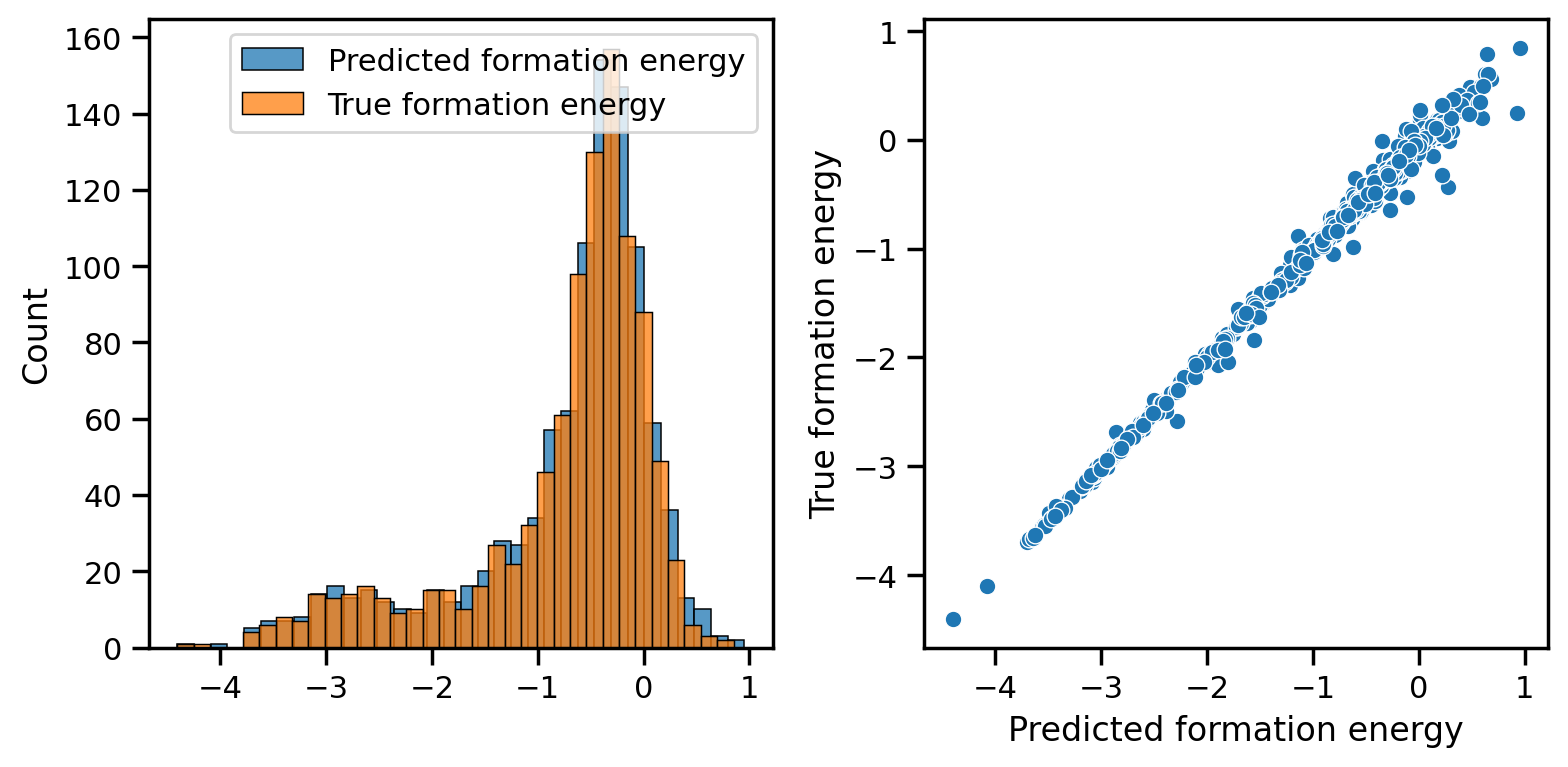

{
    'F1': 0.7506702412868632,
    'DAF': 4.154158215010142,
    'Precision': 0.8235294117647058,
    'Recall': 0.6896551724137931,
    'Accuracy': 0.9091796875,
    'TPR': 0.6896551724137931,
    'FPR': 0.03654080389768575,
    'TNR': 0.9634591961023142,
    'FNR': 0.3103448275862069,
    'TP': 140,
    'FP': 30,
    'TN': 791,
    'FN': 63,
    'MAE': 0.0395225669040542,
    'RMSE': 0.07238842397434322,
    'R2': 0.9269302372069248
}

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from matbench_discovery.metrics import stable_metrics

sns.set_context("notebook")

e_form_true, e_form_pred = zip(*preds_targets["e_form"])
e_form_true = np.array(e_form_true)
e_form_pred = np.array(e_form_pred)

e_above_hull_true, e_above_hull_pred = zip(*preds_targets["e_above_hull"])
e_above_hull_true = np.array(e_above_hull_true)
e_above_hull_pred = np.array(e_above_hull_pred)

rich.print(
    {
        "e_form": {"pred": e_form_pred.shape, "true": e_form_true.shape},
        "e_above_hull": {
            "pred": e_above_hull_pred.shape,
            "true": e_above_hull_true.shape,
        },
    }
)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

ax = axes[0]
sns.histplot(e_form_pred, label="Predicted formation energy", ax=ax)
sns.histplot(e_form_true, label="True formation energy", ax=ax)
ax.legend()

ax = axes[1]
sns.scatterplot(y=e_form_true, x=e_form_pred, ax=ax)
ax.set_xlabel("Predicted formation energy")
ax.set_ylabel("True formation energy")

fig.tight_layout()
plt.show()

metrics = stable_metrics(e_above_hull_true, e_above_hull_pred, fillna=False)
rich.print(metrics)

In [13]:
from collections import defaultdict
from functools import partial

import numpy as np
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    # fmax=0.01,
    # ase_filter="frechet",
    fmax=0.05,
    ase_filter="exp",
)
relaxer = Relaxer(
    config=config,
    model=partial(model_fn, use_y_relaxed=True),
    collate_fn=model.collate_fn,
    device=model.device,
)

dl = DataLoader(
    dataset,
    batch_size=1,
    collate_fn=model.collate_fn,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
)

preds_targets = defaultdict[str, list[tuple[float, float]]](lambda: [])

for data in tqdm(dl, total=len(dl)):
    data = move_data_to_device(data, model.device)
    relax_out = relaxer.relax(data, verbose=False)

    e_form_true = data.y_formation.item()
    e_form_pred = relax_out.atoms.get_total_energy()
    preds_targets["e_form"].append((e_form_pred, e_form_true))

    e_above_hull_true = data.y_above_hull.item()
    e_above_hull_pred = e_above_hull_true + (e_form_pred - e_form_true)
    preds_targets["e_above_hull"].append((e_above_hull_pred, e_above_hull_true))

    nsteps = len(relax_out.trajectory.frames)

    print(
        f"# Steps: {nsteps}; e_form: P={e_form_pred:.4f}, GT={e_form_true:.4f}, Δ={abs(e_form_pred - e_form_true):.4f}"
    )

  0%|          | 0/1024 [00:00<?, ?it/s]

# Steps: 23; e_form: P=-0.8421, GT=-0.8008, Δ=0.0412
# Steps: 9; e_form: P=0.0013, GT=-0.0220, Δ=0.0233
# Steps: 21; e_form: P=-0.6686, GT=-0.6088, Δ=0.0598
# Steps: 39; e_form: P=-0.2848, GT=-0.1544, Δ=0.1304
# Steps: 51; e_form: P=-0.2847, GT=-0.1154, Δ=0.1693
# Steps: 18; e_form: P=-0.3947, GT=-0.3905, Δ=0.0042
# Steps: 13; e_form: P=-0.2770, GT=-0.2468, Δ=0.0302
# Steps: 10; e_form: P=-0.4867, GT=-0.4542, Δ=0.0326
# Steps: 24; e_form: P=-1.9835, GT=-1.9089, Δ=0.0745
# Steps: 7; e_form: P=-0.1801, GT=-0.1224, Δ=0.0578
# Steps: 4; e_form: P=-1.8720, GT=-1.8781, Δ=0.0061
# Steps: 12; e_form: P=-1.5838, GT=-1.6101, Δ=0.0263
# Steps: 15; e_form: P=-1.8248, GT=-1.8180, Δ=0.0068
# Steps: 7; e_form: P=-0.3417, GT=-0.3333, Δ=0.0084
# Steps: 6; e_form: P=-0.7439, GT=-0.7299, Δ=0.0140
# Steps: 12; e_form: P=-0.0489, GT=-0.0433, Δ=0.0055
# Steps: 18; e_form: P=-0.5297, GT=-0.5591, Δ=0.0295
# Steps: 19; e_form: P=-3.1472, GT=-3.0844, Δ=0.0628
# Steps: 10; e_form: P=-1.5501, GT=-1.7130, Δ=0.1629

{'e_form': {'pred': (1024,), 'true': (1024,)}, 'e_above_hull': {'pred': (1024,), 'true': (1024,)}}

/tmp/ipykernel_3567141/3062433637.py:38: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


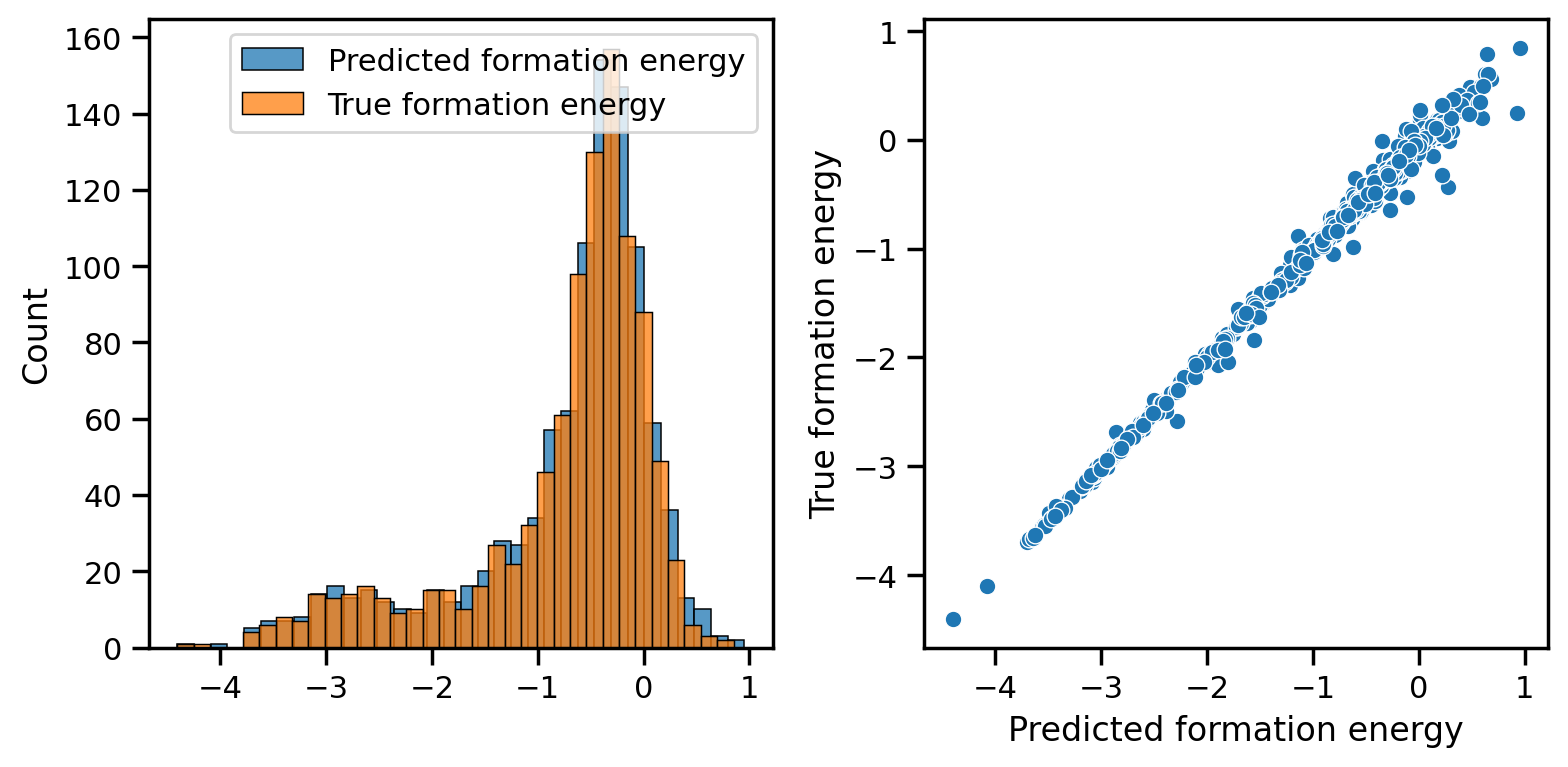

{
    'F1': 0.7506702412868632,
    'DAF': 4.154158215010142,
    'Precision': 0.8235294117647058,
    'Recall': 0.6896551724137931,
    'Accuracy': 0.9091796875,
    'TPR': 0.6896551724137931,
    'FPR': 0.03654080389768575,
    'TNR': 0.9634591961023142,
    'FNR': 0.3103448275862069,
    'TP': 140,
    'FP': 30,
    'TN': 791,
    'FN': 63,
    'MAE': 0.0395225669040542,
    'RMSE': 0.07238842397434322,
    'R2': 0.9269302372069248
}

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from matbench_discovery.metrics import stable_metrics

sns.set_context("notebook")

e_form_true, e_form_pred = zip(*preds_targets["e_form"])
e_form_true = np.array(e_form_true)
e_form_pred = np.array(e_form_pred)

e_above_hull_true, e_above_hull_pred = zip(*preds_targets["e_above_hull"])
e_above_hull_true = np.array(e_above_hull_true)
e_above_hull_pred = np.array(e_above_hull_pred)

rich.print(
    {
        "e_form": {"pred": e_form_pred.shape, "true": e_form_true.shape},
        "e_above_hull": {
            "pred": e_above_hull_pred.shape,
            "true": e_above_hull_true.shape,
        },
    }
)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

ax = axes[0]
sns.histplot(e_form_pred, label="Predicted formation energy", ax=ax)
sns.histplot(e_form_true, label="True formation energy", ax=ax)
ax.legend()

ax = axes[1]
sns.scatterplot(y=e_form_true, x=e_form_pred, ax=ax)
ax.set_xlabel("Predicted formation energy")
ax.set_ylabel("True formation energy")

fig.tight_layout()
plt.show()

metrics = stable_metrics(e_above_hull_true, e_above_hull_pred, fillna=False)
rich.print(metrics)